# Assignment 8

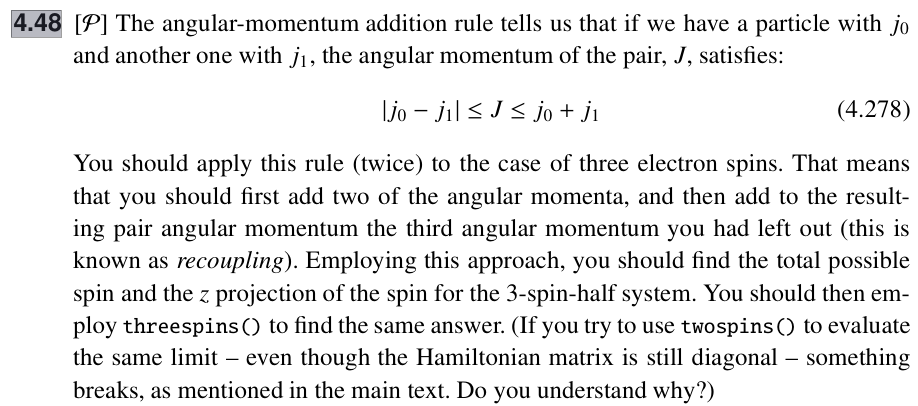

**Solution:** For two spin $1/2$ particles, the possible total spin values are

$$
0 \le J' \le 1 \implies J' \in \{0, 1\}
$$

i.e. the two electrons are either anti-parallel ($J'=0$) or parallel ($J'=1$).

Now, combining the resulting total spin with the third spin 1/2 particle,

*   If $J'=0$, $-1/2 \le J \le 1/2 \implies \boxed{J = 1/2}$ (as $J\ge0$)
*   If $J'=1$, $1/2 \le J \le 3/2 \implies \boxed{J \in \{1/2, 3/2\}}$

For each total spin value, the possible z-projections ($m_j$) range from $-J$ to $J$ in integer steps. Hence,


*   If $J=1/2$, $\boxed{m_j \in \{-1/2, 1/2\}}$
*   If $J=3/2$, $\boxed{m_j \in \{-3/2, -1/2, 1/2, 3/2\}}$



In [1]:
import numpy as np

def mag(xs):
  return np.sqrt(np.sum(xs*xs))

def qrdec(A):
  n = A.shape[0]
  Ap = np.copy(A)
  Q = np.zeros((n,n))
  R = np.zeros((n,n))
  for j in range(n):
    for i in range(j):
      R[i,j] = Q[:,i]@A[:,j]
      Ap[:,j] -= R[i,j]*Q[:,i]
    R[j,j] = mag(Ap[:,j])
    Q[:,j] = Ap[:,j]/R[j,j]
  return Q, R

def qrmet(inA,kmax=100):
  A = np.copy(inA)
  for k in range(1,kmax):
    Q, R = qrdec(A)
    A = R@Q

  qreigvals = np.diag(A)
  return qreigvals

def paulimatrices():
  sigx = np.array([0.,1,1,0]).reshape(2,2)
  sigy = np.array([0.,-1j,1j,0]).reshape(2,2)
  sigz = np.array([1.,0,0,-1]).reshape(2,2)
  return sigx, sigy, sigz

def paulimatrices():
    sigx = np.array([0.,1,1,0]).reshape(2,2)
    sigy = np.array([0.,-1j,1j,0]).reshape(2,2)
    sigz = np.array([1.,0,0,-1]).reshape(2,2)
    return sigx, sigy, sigz

def kron(U,V):
    n = U.shape[0]
    p = V.shape[0]
    W = np.zeros((n*p,n*p), dtype=np.complex64)
    for i in range(n):
        for k in range(n):
            for j in range(p):
                for l in range(p):
                    W[p*i+j,p*k+l] = U[i,k]*V[j,l]
    return W

def threespins(omI,omII,omIII,gam):
  hbar = 1.
  paulis = paulimatrices()
  iden = np.identity(2)
  SIs = [hbar*kron(kron(pa,iden),iden)/2 for pa in paulis]
  SIIs = [hbar*kron(kron(iden,pa),iden)/2 for pa in paulis]
  SIIIs = [hbar*kron(kron(iden,iden),pa)/2 for pa in paulis]
  SIdotII = sum([SIs[i]@SIIs[i] for i in range(3)])
  SIdotIII = sum([SIs[i]@SIIIs[i] for i in range(3)])
  SIIdotIII = sum([SIIs[i]@SIIIs[i] for i in range(3)])
  H = -omI*SIs[2] - omII*SIIs[2] - omIII*SIIIs[2]
  H += gam*(SIdotII+SIdotIII+SIIdotIII)
  H = H.real
  return H

np.set_printoptions(precision=3)
H = threespins(1,1,1,0)
qreigvals = qrmet(H)
print('The 8 eigenvalues are:', qreigvals)

The 8 eigenvalues are: [-1.5 -0.5 -0.5  0.5 -0.5  0.5  0.5  1.5]


The addition of a third particle introduces additional quantum states and interactions that might not be accounted for by the twospins function. Mathematically, the Kronecker product is not commutative, so it matters how the Pauli matrices are operated on. Hence, this cannot be done properly by the twospins function.

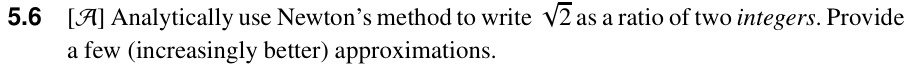

**Solution:** To find $\sqrt{2}$, we can use Newton's method on the function $f(x) = x^2 - 2$.

Using the iterative formula for Newton's method,

$$x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})}$$

where $x^k$ is the current approximation and $x^{(k+1)}$ is the next approximation.

For $f(x) = x^2 - 2$, we have $f'(x) = 2x$. Hence, the iterative formula becomes,

$$
x^{(k+1)} = x^{(k)} - \frac{(x^{(k)})^2-2}{2x^{(k)}}\\
\boxed{x^{(k+1)} = \frac{(x^{(k)})^2-2}{2x^{(k)}}}\\
x^{(k+1)} = \frac{x^{(k)} + 2/x^{(k)}}{2}
$$


Let $x_0 = 1$. Using the iterative formula, we can calculate the following approximations:

$$
x^{(1)} = \frac{1 + \frac{2}{1}}{2} = \frac{3}{2} = 1.5\\
x^{(2)} = \frac{1.5 + \frac{2}{1.5}}{2} = 1.4166667\\
x^{(3)} = \frac{1.4166667 + \frac{2}{1.4166667}}{2} = 1.4142157\\
x^{(4)} = \frac{1.4142157 + \frac{2}{1.4142157}}{2} = 1.4142136\\
x^{(5)} = \frac{1.4142136 + \frac{2}{1.4142136}}{2} = 1.4142136\\ \implies \sqrt{2} \approx \frac{14142136}{10000000} = \frac{1767767}{1250000}
$$

As we can see, the approximations are converging to a value of $1.4142136$, which is $\sqrt{2}$.

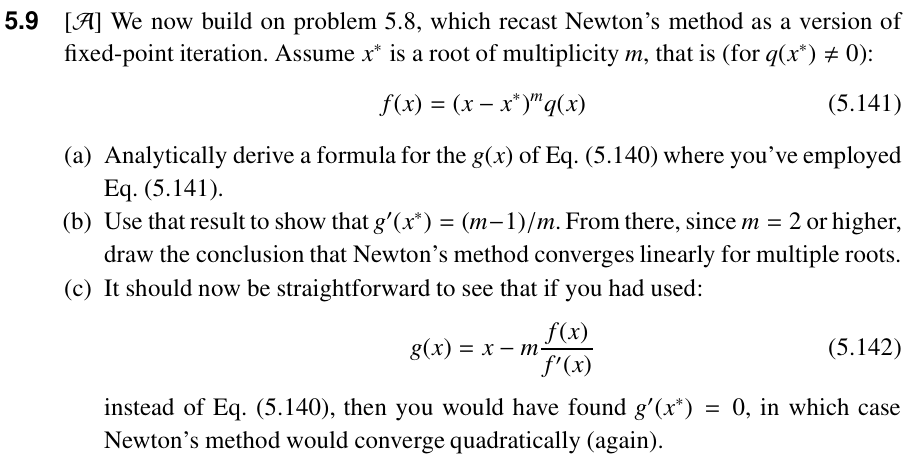

**Part (a):** The iterative formula for Newton's method is,

$$x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})}$$

Rewriting in terms of fixed-point iteration,
$$
g(x) = x - \frac{f(x)}{f'(x)}\\
= x - \frac{(x-x^*)^mq(x)}{m(x-x^*)^{m-1}q(x)+(x-x^*)^mq'(x)}\\
= x - \frac{(x-x^*)}{m+\frac{(x-x^*)q'(x)}{q(x)}}
$$

**Part (b):** Differentiating $g(x)$,

$$
g'(x) = 1 - \frac{m+\frac{(x-x^*)q'(x)}{q(x)}+\frac{q''(x)q(x)-(q'(x))^2}{(q(x))^2}(x-x^*)^2}{\left(m+\frac{(x-x^*)q'(x)}{q(x)}\right)^2}\\
$$

Substituting $x=x^*$, we get
$$g'(x^*)=1-\frac{m}{m^2}=\frac{m-1}{m}$$​

For multiple roots, $m\ge2$, which means $g'(x^*)<1$. Hence, Newton's method converges linearly for multiple roots, as the convergence rate is determined by the absolute value of $g'(x^*)$.

**Part (c):**
If we use

$$
g(x) = x - m\frac{f(x)}{f'(x)}\\
\implies g(x) = x - m\frac{(x-x^*)^mq(x)}{m(x-x^*)^{m-1}q(x)+(x-x^*)^mq'(x)}\\
\implies g(x) = x - \frac{m(x-x^*)}{m+\frac{(x-x^*)q'(x)}{q(x)}}
$$

Differentiating $g(x)$,

$$
g'(x) = 1 - m\frac{m+\frac{(x-x^*)q'(x)}{q(x)}+\frac{q''(x)q(x)-(q'(x))^2}{(q(x))^2}(x-x^*)^2}{\left(m+\frac{(x-x^*)q'(x)}{q(x)}\right)^2}\\
$$

Substituting $x=x^*$, we get
$$g'(x^*)=1-\frac{m^2}{m^2}=0$$​

Therefore, by multiplying the function by the multiplicity of the root, as shown above, we can achieve quadratic convergence for multiple roots.